In [1]:
# again, this only works on startup!
import jax
jax.config.update("jax_enable_x64", True)

In [2]:
import jax.numpy as jnp
from jax.scipy.integrate import trapezoid

In [3]:
def u(x,t):
    return jnp.sin(x) + jnp.cos(t)

def u_t(x,t):
    return jnp.sin(x) - jnp.sin(t)

def a(x):
    return jnp.sin(x) + 1


In [6]:
from scipy.integrate import cumulative_trapezoid
import jax.numpy as jnp
from jax.numpy import trapezoid
from jax import vmap
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


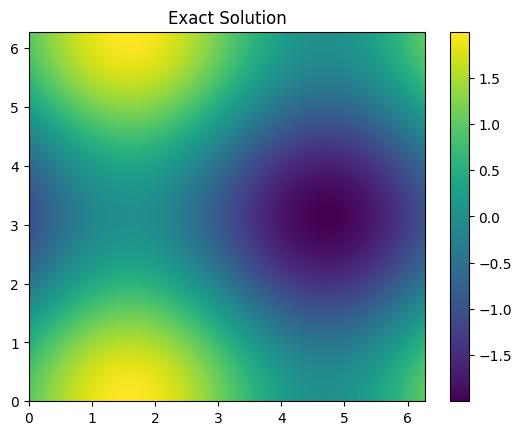

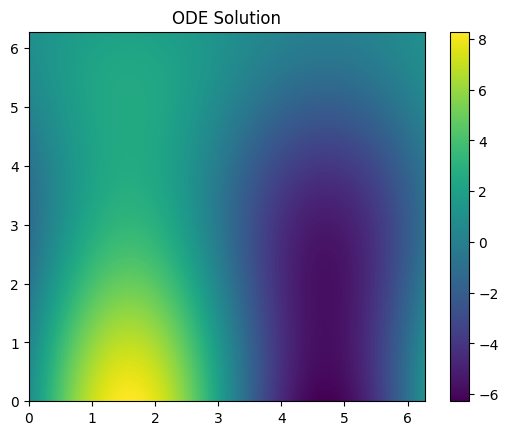

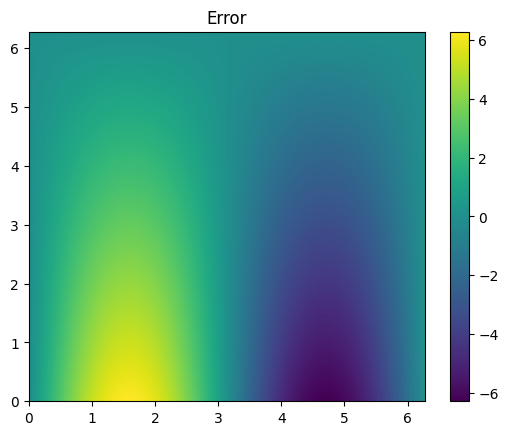

In [7]:

def u2(a, x, t):
    """t : scalar, x array"""
    t_arr = jnp.linspace(0, t, 100)
    integral = trapezoid(u_t(x, t_arr[:, None]), t_arr, axis=0)

    # Add the initial condition
    return a(x) + integral

x = jnp.linspace(0, 2*jnp.pi, 100)
t = jnp.linspace(0, 2*jnp.pi, 200)

u2_arr = vmap(u2, (None, None, 0))(a, x, t)


def u2(a, x, t):
    return a(x) + cumulative_trapezoid(u_t(x[None, :], t[:, None]), t, axis=0, initial=0)


res = u2(a, x, t)

# Visualization
plt.figure()
plt.imshow(u(x[None, :], t[:, None]), aspect='auto', extent=[0, 2 * jnp.pi, 0, 2 * jnp.pi])
plt.title("Exact Solution")
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(res, aspect='auto', extent=[0, 2 * jnp.pi, 0, 2 * jnp.pi])
plt.title("ODE Solution")
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(res-u(x[None, :], t[:, None]), aspect='auto', extent=[0, 2 * jnp.pi, 0, 2 * jnp.pi])
plt.title("Error")
plt.colorbar()
plt.show()

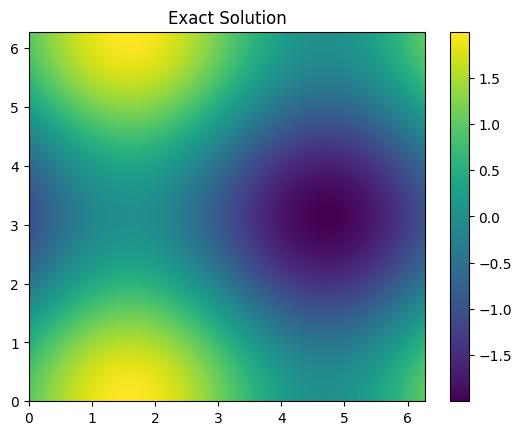

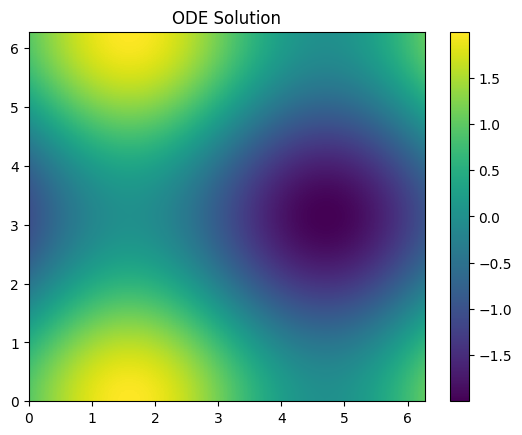

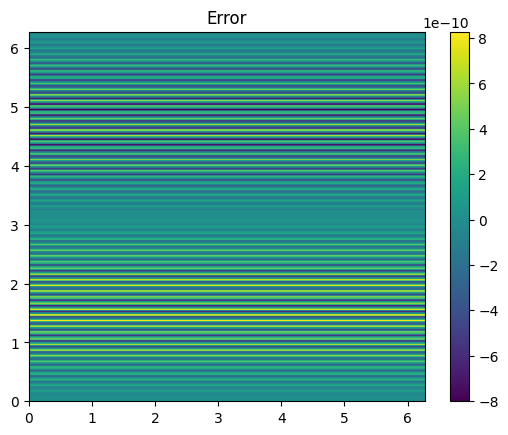

In [9]:
from diffrax import diffeqsolve, ODETerm, Tsit5, SaveAt, PIDController
import jax.numpy as jnp
import matplotlib.pyplot as plt

def u(x, t):
    return jnp.sin(x) + jnp.cos(t)

def u_t(x, t):
    return - jnp.sin(t)

# Corrected `f` to properly account for dimensions
def f(t, y, x):
    return u_t(x, t)

x = jnp.linspace(0, 2 * jnp.pi, 100)  # Spatial grid
t = jnp.linspace(0, 2 * jnp.pi, 200)  # Time grid

# Setup for ODE
term = ODETerm(f)
solver = Tsit5()
saveat = SaveAt(ts=t)
#stepsize_controller = PIDController(rtol=1e-10, atol=1e-10)
y0 = u(x, 0)  # Initial condition
solution = diffeqsolve(term, solver, t0=0, t1=2 * jnp.pi, dt0=0.1, y0=y0, args=x, saveat=saveat)

# Visualization
plt.figure()
plt.imshow(u(x[None, :], t[:, None]), aspect='auto', extent=[0, 2 * jnp.pi, 0, 2 * jnp.pi])
plt.title("Exact Solution")
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(solution.ys, aspect='auto', extent=[0, 2 * jnp.pi, 0, 2 * jnp.pi])
plt.title("ODE Solution")
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(solution.ys-u(x[None, :], t[:, None]), aspect='auto', extent=[0, 2 * jnp.pi, 0, 2 * jnp.pi])
plt.title("Error")
plt.colorbar()
plt.show()
